In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def extract_data(filename):
    training_iterations = []
    bc_loss_values = []
    with open(filename, 'r') as infile:
        lines = infile.readlines()
    for line in lines:
        if 'Training iterations' in line:
            training_iterations.append(int(line.split(':')[-1].strip()))
        elif 'bc_loss' in line:
            bc_loss_values.append(float(line.split(':')[-1].strip()))
    return training_iterations, bc_loss_values

In [3]:
def extract_data_diff_simpleNN(filename):
    training_iterations = []
    loss_values = {
        "con": [],
        "dis_1": [],
        "dis_2": []
    }
    
    with open(filename, 'r') as infile:
        lines = infile.readlines()
    
    for line in lines:
        line = line.strip()
        if 'Training iterations:' in line:
            training_iterations.append(int(line.split(':')[-1].strip()))
        elif 'bc_loss:' in line:
            loss_values["con"].append(float(line.split(':')[-1].strip()))
        elif 'mode_loss:' in line:
            loss_values["dis_1"].append(float(line.split(':')[-1].strip()))
        elif 'end_indicator_loss:' in line:
            loss_values["dis_2"].append(float(line.split(':')[-1].strip()))
    
    return training_iterations, loss_values

In [4]:
files = [
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_1.o9385983',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_2.o9385987',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_3.o9385988',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_4.o9387215',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_5.o9387221',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_6.o9407130',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_7.o9407128',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_8.o9407215',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_9.o9407234',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_10.o9411153',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_11.o9412526',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_12_512.o9415571',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_12_1024.o9416969',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13.o9416158',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_512.o9416971',
    # # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_1024.o9416992',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_14_512.o9429950',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_14_1024.o9429949',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_15_1024.o9431464',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_16_1024.o9431594',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_17_1024.o9431597',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_18_1024.o9433016',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_19_1024.o9469042',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_20_1024.o9479091',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_21_1024.o9479093',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_20_1024_continue_training.o9484559',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_21_1024_continue_training.o9484560',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_23_5k_822.o9485513',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_23_10k_822.o9485515',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_23_2k_824.o9485522',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_23_5k_824.o9485523',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_22_2k_422.o9485588',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_22_5k_422.o9485589',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_24.o170',
    # # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_25.o169',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_26.o196',
    '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_27.o199',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_28.o202',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_27_2048.o12',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_29.o554',
    '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_32.o621',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/train1.o1.log',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/train2.o2.log',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/train3.o3.log',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_31.o683',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_38.o818',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_39.o819',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_40.o820',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_41.o834',
    # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_42.o837'
    '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_56.o9772613',
    '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_57.o9772972',
    '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_58.o9784045'
]
# 
task_name = [
#     # # # 'Same observation space as RL',
#     # # # 'Pose desired goal',
#     # # # 'Pose desired goal with norm',
#     # 'Task 1: 1817 demos',  # 'Informative observation space'
#     # 'Informative observation space with norm',
#     # # 'Task 2: layer_size = 256, ',  # 'Add Rotation 5mm threshold'
#     # # # 'Add Rotation 2mm threshold',
#     # 'Task 1: 5947 demos', # '5947 demos without R - Informative observation space'
#     # # # '5947 demos without R- Informative observation space with norm',
#     # 'Task 1: 10000 demos',
#     # 'Task 1: 10000 demos with pre-train',
#     # # 'Task 2: layer_size = 512',
#     # # 'Task 2: layer_size = 1024',
#     # # # 'only continuous - layer_size = 256',
#     # # # 'only continuous - layer_size = 512',
#     # # # 'only continuous - layer_size = 1024',
#     # # 'Task 1 - Random_without_R: layer_size = 512',
#     # # 'Task 1 - Random_without_R: layer_size = 1024',
#     # # 'Task 1 - Random_without_R: layer_size = 1024, obs+action',
#     # # 'Task 2 - Random_R: layer_size = 1024',
#     # # 'Task 2 - Random_R: layer_size = 1024, obs+action',
#     # # 'Task 2: layer_size = 1024, obs+action',
#     # 'Task 2: Big Steps',
#     'Task 2: Big Steps - 5000',
#     'Task 2: Big Steps - 10000',
#     # 'Task 2: Big Steps - 5000 continue',
#     'Task 2: Big Steps - 10000 continue',
#     # '822 5k',
#     # '822 10k',
#     # '824 2k',
#     # '824 5k',
#     # '422 2k',
#     # '422 5k',
#     # '24',
#     # # '25',
#     # '26',
    '27',
#     # '28',
#     # '27_2048',
#     '29: only slide',
    '32',
#     't1',
#     't2',
#     't3',
#     '31 end indicator',
#     '38',
#     '39',
#     # '40',
#     '41',
#     '42',
    '56',
    '57',
    '58'
]

In [5]:
# files = [
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_38.o818',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_39.o819',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_40.o820',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_41.o834',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_42.o837',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_43.o838',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_44.o839'
# ]
# 
# task_name = [
#     '38',
#     '39',
#     # '40',
#     '41',
#     '42',
#     # '43',
#     # '44',
# ]

In [6]:
#  files = [
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13.o9416158',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_512.o9416971',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_1024.o9416992',
# ]
# 
# task_name = [
#     'only continuous - layer_size = 256',
#     'only continuous - layer_size = 512',
#     'only continuous - layer_size = 1024',
# ]

In [7]:
# files = [
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_1.o9385983',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_2.o9385987',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_3.o9385988',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_4.o9387215',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_5.o9387221',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_6.o9407130',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_7.o9407128',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_8.o9407215',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_9.o9407234',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_10.o9411153',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_11.o9412526',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_12_512.o9415571',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_12_1024.o9416969',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13.o9416158',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_512.o9416971',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_13_1024.o9416992',
# ]
# 
# task_name = [
#     # 'Same observation space as RL',
#     # 'Pose desired goal',
#     # 'Pose desired goal with norm',
#     # 'Task 1: 1817 demos',  # 'Informative observation space'
#     # 'Informative observation space with norm',
#     # 'Task 2: layer_size = 256, ',  # 'Add Rotation 5mm threshold'
#     # 'Add Rotation 2mm threshold',
#     # 'Task 1: 5947 demos', # '5947 demos without R - Informative observation space'
#     # '5947 demos without R- Informative observation space with norm',
#     '10000 demos',
#     '10000 demos with pre-train',
#     'Task 2: layer_size = 512',
#     'Task 2: layer_size = 1024',
#     # 'only continuous - layer_size = 256',
#     # 'only continuous - layer_size = 512',
#     # 'only continuous - layer_size = 1024',
# ]

In [8]:
# files = [
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_51.o942',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_52.o941'
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_53.o990',
#     # '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_38.o818',
#     '/Users/qiyangyan/Desktop/Diffusion/Demonstration/Diffusion_55.o9545012'
# ]
# 
# task_name = [
#     # '51',
#     # '52'
#     # '53',
#     # '38'
#     '55'
# ]

27:  0.023446255633607506
32:  0.0034772235061973334
56:  0.012442614492028952
57:  0.0036990449437871577
58:  0.03251753631979227


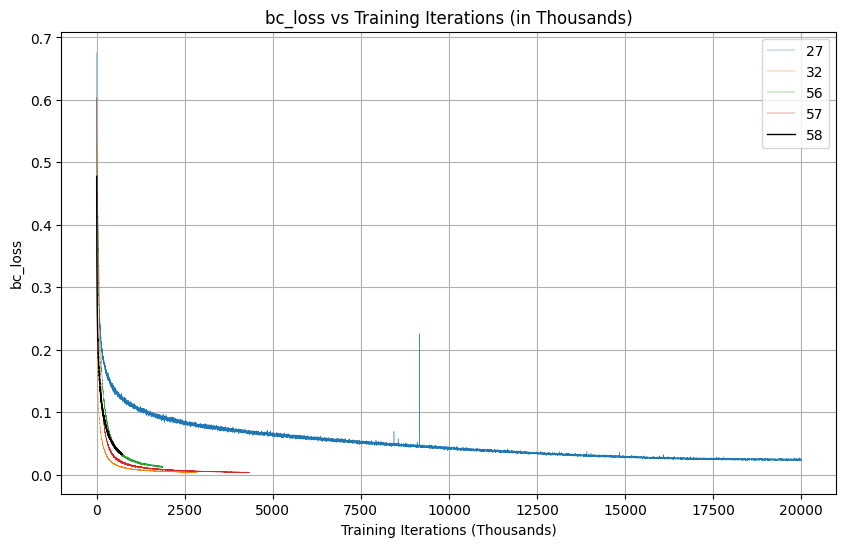

In [9]:
plt.figure(figsize=(10, 6))
for i, file in enumerate(files):
    training_iterations, bc_loss_values = extract_data(file)
    training_iterations = [itr / 1000 for itr in training_iterations]
    # print(i)
    if task_name[i] == 'Informative observation space with norm':
        plt.plot(training_iterations[8859:], bc_loss_values[8859:], linestyle='-', label=task_name[i], linewidth=0.3)
    elif task_name[i] == 'Task 1: 10000 demos':
        plt.plot(training_iterations[:1200], bc_loss_values[:1200], linestyle='-', label=task_name[i], linewidth=0.3, color='blue')
    elif task_name[i] == 'Task 1: 10000 demos with pre-train':
        plt.plot(np.array(training_iterations[:-1200])+1200, bc_loss_values[:-1200], linestyle='-', linewidth=0.3, color='blue')
    elif i == len(task_name)-1:
        plt.plot(training_iterations, bc_loss_values, linestyle='-', label=task_name[i], linewidth=1, color='black')
    else:
        plt.plot(training_iterations, bc_loss_values, linestyle='-', label=task_name[i], linewidth=0.3)

    print(f"{task_name[i]}: ", bc_loss_values[-1])

plt.title('bc_loss vs Training Iterations (in Thousands)')
plt.xlabel('Training Iterations (Thousands)')
# plt.ylim([0, 0.005])
plt.ylabel('bc_loss')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# file = [
#     '/Users/qiyangyan/Desktop/Diffusion/Policies_discrete/Diffusion_2.o1167'
# ]
# 
# training_iterations, loss_values = extract_data_diff_simpleNN(file[0])
# for key in loss_values.keys():
#         print(np.shape(loss_values[key]))

# with open(file[0], 'r') as infile:
#     lines = infile.readlines()
# print(lines)

In [11]:
# # Initialize subplots
# fig, axs = plt.subplots(3, 1, figsize=(6, 10))
# 
# # Plot each loss value in separate subplots
# training_iterations, loss_values = extract_data_diff_simpleNN(file[0])
# training_iterations = [itr / 1000 for itr in training_iterations]
# 
# for key in loss_values.keys():
#     print(np.shape(loss_values[key]))
# 
# for j, key in enumerate(loss_values.keys()):
#     print(f"Task: {task_name[i]}, Key: {key}, Shape: {np.shape(loss_values[key])}")
#     
#     if len(training_iterations) != len(loss_values[key]):
#         print(f"Warning: Length mismatch for {key} in {task_name[i]}")
#     
#     axs[j].plot(training_iterations, loss_values[key], linestyle='-', linewidth=0.3)
#     axs[j].set_title(f'{key} vs Training Iterations (in Thousands)')
#     axs[j].set_xlabel('Training Iterations (Thousands)')
#     axs[j].set_ylabel(key)
#     axs[j].grid(True)
# 
# # Print the last loss value for each task and key
# for key in loss_values.keys():
#     print(f"{task_name[i]} - {key}: ", loss_values[key][-1])
# 
# 
# plt.tight_layout()
# plt.show()